---
---

# <center><font color='black'>The Hodgkin-Huxley Model</font></center> <a class="tocSkip">
    
### <center><font color='black'>Nicolai Haug</font></center> <a class="tocSkip">
    
### <center><font color='black'>2021</font></center> <a class="tocSkip">
    
---
---

# Table of Contents <a class="tocSkip">

* [Introduction](#introduction)
    * [Configure Notebook](#configure) 
* [Section Two](#)

# Introduction <a name="introduction"></a> 

blank

## Configure Notebook <a name="configure"></a>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-circle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
        Run the cell below to configure the notebook. 
    </p>
<div>
</div>
</div>

In [1]:
import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from IPython.display import display
from latex_envs.latex_envs import figcaption 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import default_rng

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          #'legend.handlelength': 2
         }
plt.rcParams.update(params)
plt.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
# Import code from pylfi
sys.path.insert(0, '../../pylfi/')

from distances import *
from inferences import *
from journal import *
from priors import *

In [3]:
# Import code from models
sys.path.insert(0, '../../models/')

from hodgkin_huxley import HodgkinHuxley
from hh_simulator import HHSimulator
from spiking_features import SpikingFeatures
from stimulus import constant_stimulus

## Resources 

https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.150499

# The Hodgkin-Huxley Model 

From a biophysical point of view, action potentials are the result of currents that pass through ion channels in the cell membrane. In an extensive series of experiments on the giant axon of the squid, Hodgkin and Huxley succeeded to measure these currents and to describe their dynamics in terms of differential equations.


<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; Hodgkin-Huxley Model</b><br>
<div>

\begin{eqnarray}
    C\frac{dV}{dt} &=& I - \bar g_{K^+} n^4 (V - E_{K^+}) - \bar g_{Na^+} m^3 h(V - E_{Na^+} ) - g_L (V - E_L)
    \\ 
    \frac{dn}{dt} &=& \frac{n_\infty (V) - n}{\tau_n (V)} 
    \\
    \frac{dm}{dt} &=& \frac{m_\infty (V) - m}{\tau_m(V)} 
    \\
    \frac{dh}{dt} &=&  \frac{h_\infty (V) - h}{\tau_h (V)}
\end{eqnarray}

</div>
</div>

It is convenient to rewrite the last three equations in the form

\begin{equation}
    \frac{dx}{dt} = \alpha_x(V)(1 - x) - \beta_x (V )x  \qquad \mbox{where} \ x \in \{n, m, h\}.
\end{equation}

The coefficients $\alpha_x (V )$ and $\beta_x (V )$ represent the (voltage-dependent) activation and inactivation rates, respectively, for the gate $x$. With these coefficients, the steady-state activation variables $x_\infty(V )$ and the time constants $\tau_x(V )$ in the Hodgkin-Huxley equations are given by

\begin{equation*}
    x_\infty (V) = \frac{\alpha_x (V)}{\alpha_x (V) + \beta_x (V)}
\end{equation*}

and

\begin{equation*}
    \tau_x (V ) = \frac {1}{\alpha_x (V) + \beta_x(V)}.
\end{equation*}

## Voltage Trace

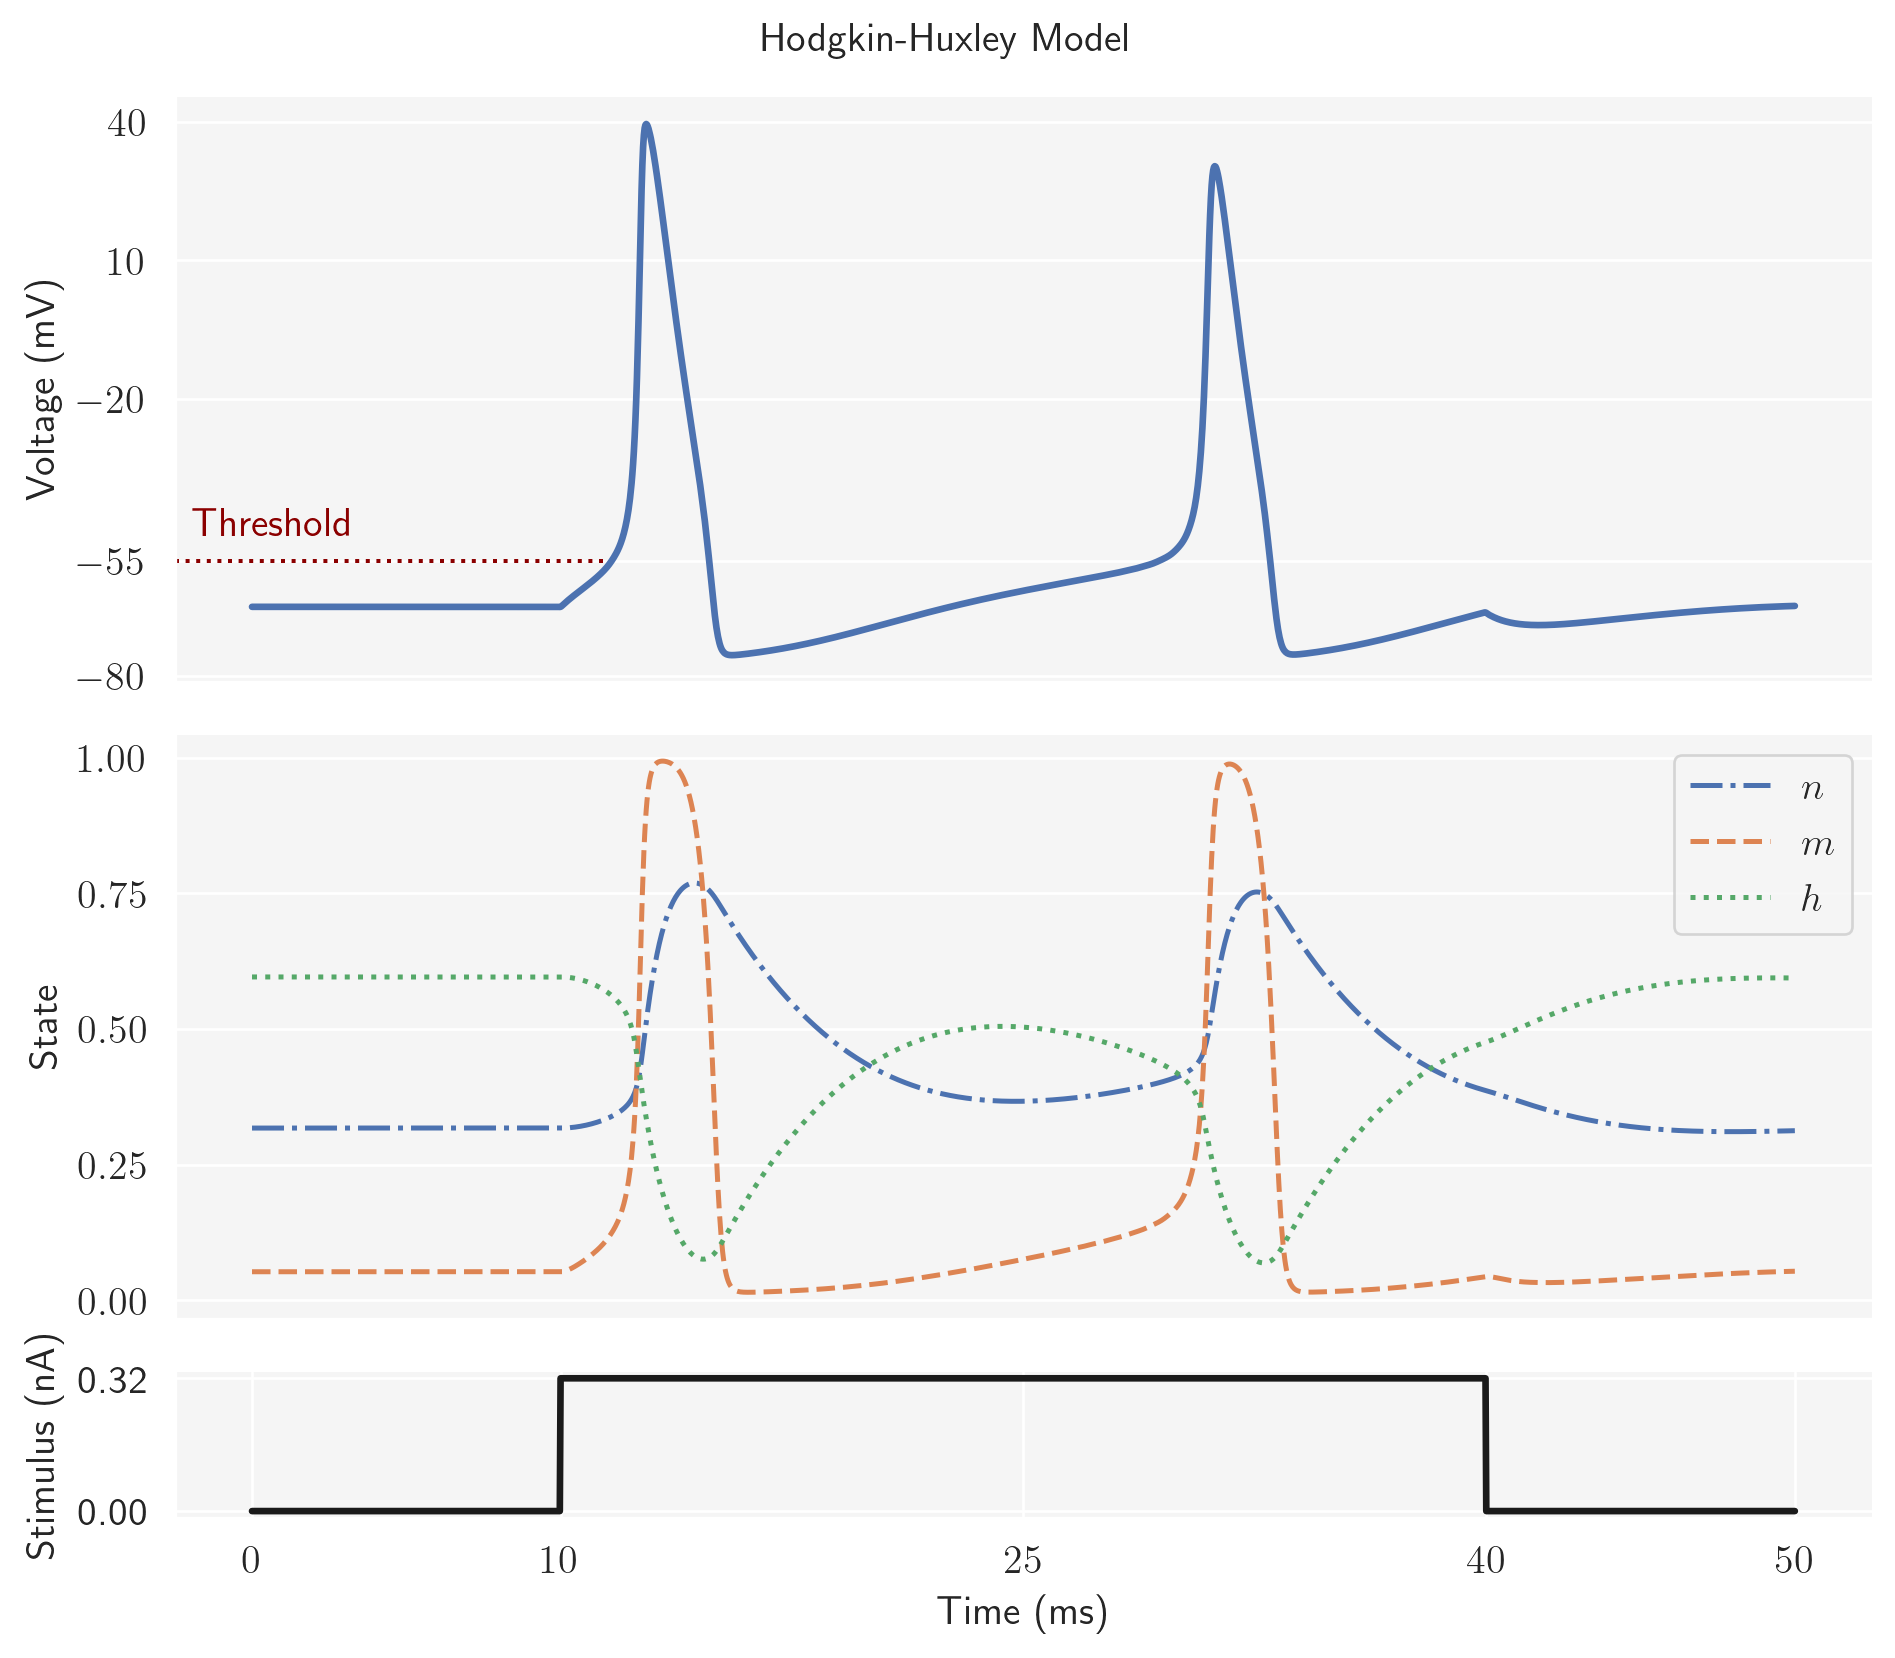

In [4]:
# remove top and right axis from plots
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# simulation parameters
T = 50.
dt = 0.025
I_amp = 0.32
r_soma = 40
threshold = -55  # AP threshold

# input stimulus
stimulus = constant_stimulus(
    I_amp=I_amp, T=T, dt=dt, t_stim_on=10, t_stim_off=40, r_soma=r_soma)
# print(stimulus["info"])
I = stimulus["I"]
I_stim = stimulus["I_stim"]

# HH simulation
hh = HodgkinHuxley()
hh.solve(I, T, dt)
t = hh.t
V = hh.V
n = hh.n
m = hh.m
h = hh.h

# plot voltage trace
fig = plt.figure(figsize=(8, 7), tight_layout=True, dpi=120)
gs = gridspec.GridSpec(3, 1, height_ratios=[4, 4, 1])
ax = plt.subplot(gs[0])
plt.plot(t, V, lw=2)
plt.text(0.01, 0.25, 'Threshold', fontsize=12,
         color='darkred', transform=plt.gca().transAxes)
plt.axhline(threshold, xmax=0.253, ls=':', color='darkred')
plt.ylabel('Voltage (mV)')
ax.set_xticks([])
ax.set_yticks([-80, -55, -20, 10, 40])

ax = plt.subplot(gs[1])
plt.plot(t, n, '-.', lw=1.5, label='$n$')
plt.plot(t, m, "--", lw=1.5, label='$m$')
plt.plot(t, h, ls=':', lw=1.5, label='$h$')
plt.legend(loc='upper right')
plt.ylabel("State")
ax.set_xticks([])
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

ax = plt.subplot(gs[2])
plt.plot(t, I_stim, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (nA)')

ax.set_xticks([0, 10, 25, 40, np.max(t)])
ax.set_yticks([0, np.max(I_stim)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

fig.suptitle("Hodgkin-Huxley Model")
plt.show()

## Spiking Features

In [5]:
# simulation parameters
T = 120.
dt = 0.01
I_amp = 0.32  # 0.1 #0.31
r_soma = 40  # 15

# input stimulus
stimulus = constant_stimulus(
    I_amp=I_amp, T=T, dt=dt, t_stim_on=10, t_stim_off=110, r_soma=r_soma)
# print(stimulus["info"])
I = stimulus["I"]
I_stim = stimulus["I_stim"]

# HH simulation
hh = HodgkinHuxley()
hh.solve(I, T, dt)
t = hh.t
V = hh.V

# find spikes
threshold = -55  # AP threshold
duration = stimulus["duration"]
t_stim_on = stimulus["t_stim_on"]

features = SpikingFeatures(V, t, duration, t_stim_on, threshold)

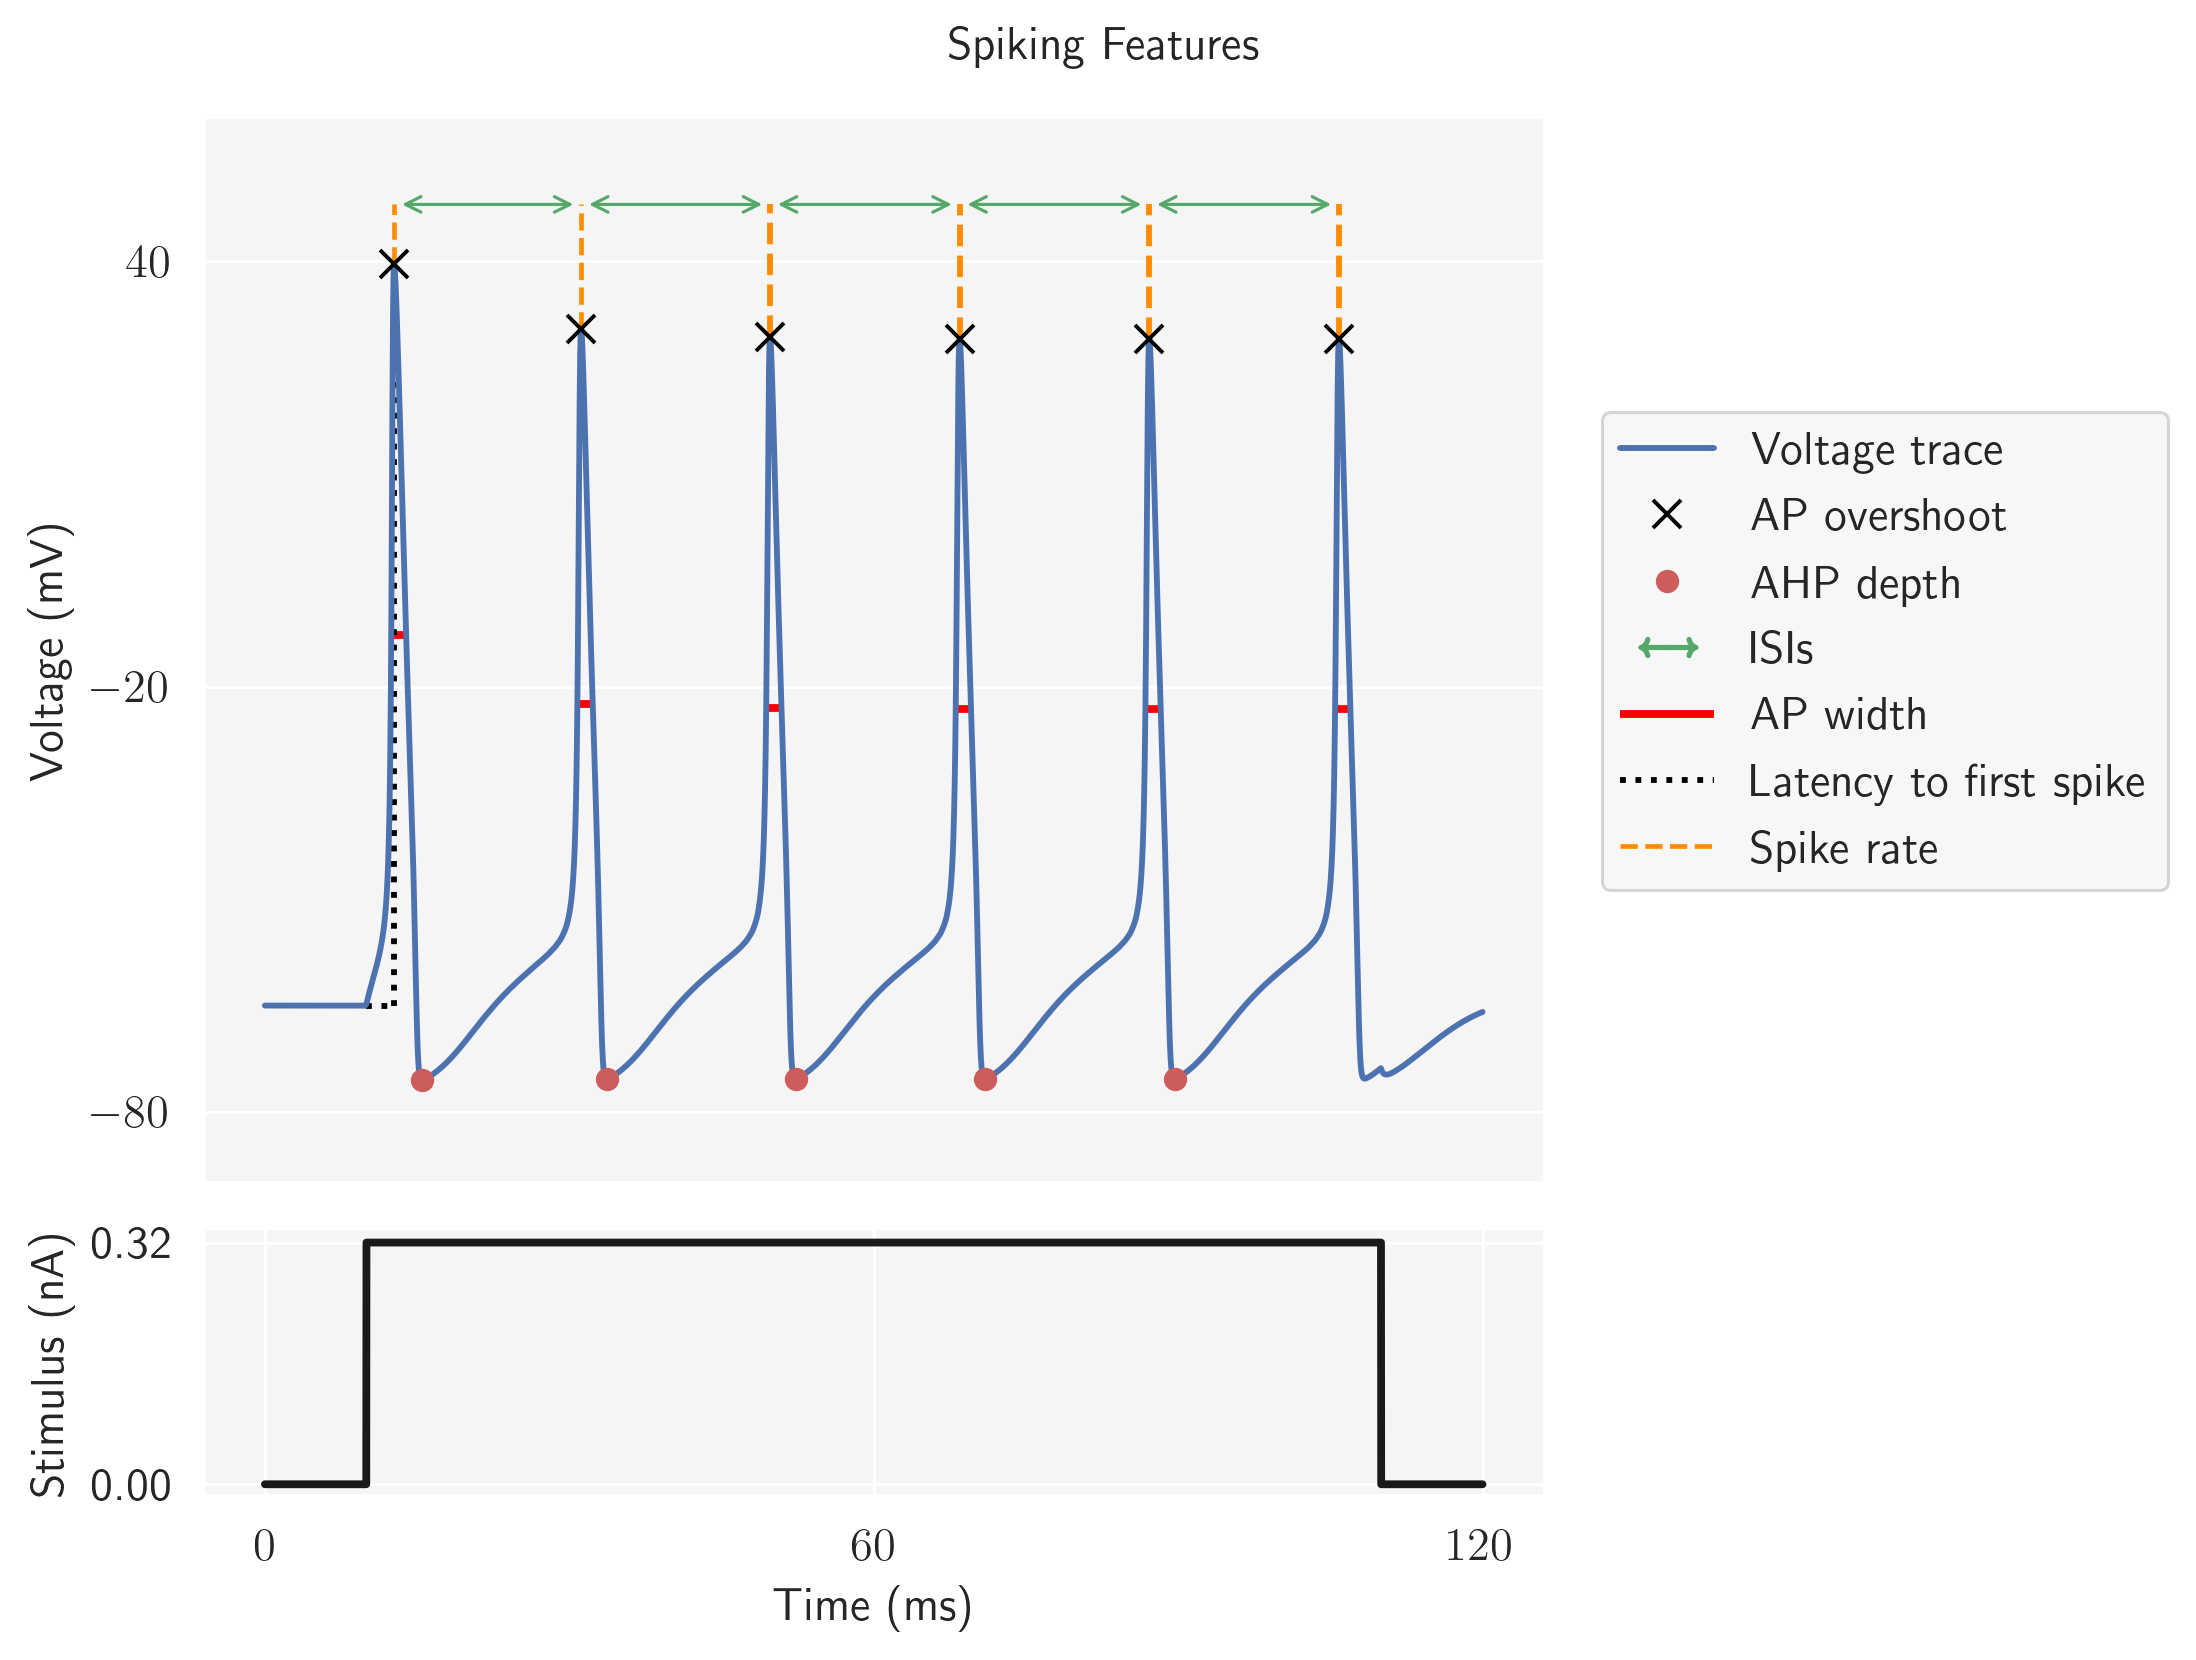

In [6]:
# plot voltage trace with features
spike_pos = features.spikes_position
V_spikes_height = features.V_spikes_height
contour_lines = features.contour_lines
ahp_depth_pos = features.AHP_depth_pos

fig = plt.figure(figsize=(8, 6), tight_layout=True, dpi=140)
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
ax = plt.subplot(gs[0])

# voltage trace
plt.plot(t, V, lw=1.5, label='Voltage trace')

# AP overshoot
plt.plot(t[spike_pos], V[spike_pos], "x",
         ms=7, color='black', label='AP overshoot')

# AP widths
plt.hlines(*contour_lines, color="red", lw=2, label='AP width')

# AHP depths
plt.plot(t[ahp_depth_pos], V[ahp_depth_pos], 'o',
         ms=5, color='indianred', label='AHP depth')

# latency to first spike
plt.hlines(hh.V_rest, t_stim_on,
           t[spike_pos[0]], color='black', lw=1.5, ls=":")
plt.vlines(t[spike_pos[0]], hh.V_rest, V_spikes_height[0],
           color='black', lw=1.5, ls=":", label="Latency to first spike")

# the marked ISIs are used to compute the accommodation index
# ISI arrow legend
plt.plot([], [], color='g', marker=r'$\longleftrightarrow$',
         linestyle='None', markersize=15, label='ISIs')

# ISI spike 1 -> 2
plt.vlines(t[spike_pos[0]], V[spike_pos[0]],
           48, color='darkorange', ls='--', label='Spike rate')
plt.annotate('', xy=(t[spike_pos[0]], 48), xycoords='data',
             xytext=(t[spike_pos[1]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 2 -> 3
plt.vlines(t[spike_pos[1]], V[spike_pos[1]],
           48, color='darkorange', ls='--')
plt.annotate('', xy=(t[spike_pos[1]], 48), xycoords='data',
             xytext=(t[spike_pos[2]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 3 -> 4
plt.vlines(t[spike_pos[2]], V[spike_pos[2]],
           48, color='darkorange', lw=1.5, ls='--')
plt.annotate('', xy=(t[spike_pos[2]], 48), xycoords='data',
             xytext=(t[spike_pos[3]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 4 -> 5
plt.vlines(t[spike_pos[3]], V[spike_pos[3]],
           48, color='darkorange', lw=1.5, ls='--')
plt.annotate('', xy=(t[spike_pos[3]], 48), xycoords='data',
             xytext=(t[spike_pos[4]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})
# ISI spike 5 -> 6
plt.vlines(t[spike_pos[4]], V[spike_pos[4]],
           48, color='darkorange', lw=1.5, ls='--')
plt.vlines(t[spike_pos[5]], V[spike_pos[5]],
           48, color='darkorange', lw=1.5, ls='--')
plt.annotate('', xy=(t[spike_pos[4]], 48), xycoords='data',
             xytext=(t[spike_pos[5]], 48), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'color': 'g'})

plt.ylabel('Voltage (mV)')
plt.ylim(-90, 60)
ax.set_xticks([])
ax.set_yticks([-80, -20, 40])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,
           labels,
           loc='center left',
           bbox_to_anchor=(1.04, 0.5),
           fancybox=True,
           borderaxespad=0.1,
           ncol=1
           )

ax = plt.subplot(gs[1])
plt.plot(t, I_stim, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (nA)')
ax.set_xticks([0, np.max(t) / 2, np.max(t)])
ax.set_yticks([0, np.max(I_stim)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

fig.suptitle("Spiking Features")
plt.show()

In [7]:
# number of spikes
n_spikes = features.n_spikes
print(f"{n_spikes=}")

# spike rate
spike_rate = features.spike_rate
print(f"{spike_rate=:.4f} mHz")

# latency to first spike
latency_to_first_spike = features.latency_to_first_spike
print(f"{latency_to_first_spike=:.4f} ms")

# average AP overshoot
average_AP_overshoot = features.average_AP_overshoot
print(f"{average_AP_overshoot=:.4f} mV")

# average AHP depth
average_AHP_depth = features.average_AHP_depth
print(f"{average_AHP_depth=:.4f} mV")

# average AP width
average_AP_width = features.average_AP_width
print(f"{average_AP_width=:.4f} mV")

# accommodation index
accommodation_index = features.accommodation_index
print(f"{accommodation_index=:.4f}")

n_spikes=6
spike_rate=0.0600 mHz
latency_to_first_spike=2.7400 ms
average_AP_overshoot=31.0680 mV
average_AHP_depth=-62.7854 mV
average_AP_width=0.8873 mV
accommodation_index=0.0006


## ABC

### Simulator

In [8]:
# simulation parameters
T = 120.
dt = 0.01
I_amp = 0.32  # 0.1 #0.31
r_soma = 40  # 15

# input stimulus
stimulus = constant_stimulus(I_amp=I_amp, T=T, dt=dt, t_stim_on=10, t_stim_off=110, r_soma=r_soma)
I = stimulus["I"]
I_stim = stimulus["I_stim"]
duration = stimulus["duration"]
t_stim_on = stimulus["t_stim_on"]

# simulator
hh_simulator = HHSimulator(T, dt, I, t_stim_on, duration, feature='spike_rate')

### Observed data

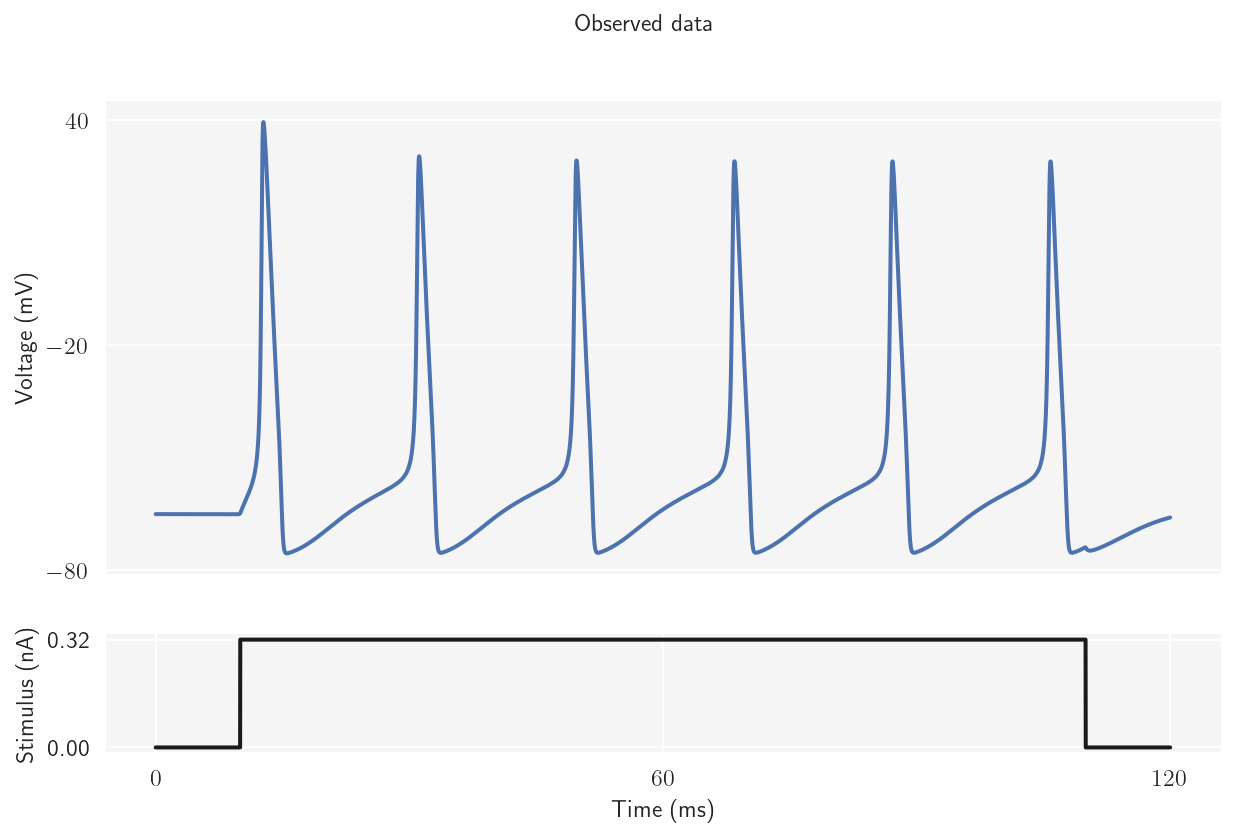

In [10]:
# observed data 
t_obs, V_obs = hh_simulator.generate_data()

# plot voltage trace
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
ax = plt.subplot(gs[0])
plt.plot(t_obs, V_obs, lw=2)
plt.ylabel('Voltage (mV)')
ax.set_xticks([])
ax.set_yticks([-80, -20, 40])

ax = plt.subplot(gs[1])
plt.plot(t_obs, I_stim, 'k', lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus (nA)')

ax.set_xticks([0, np.max(t) / 2, np.max(t)])
ax.set_yticks([0, np.max(I_stim)])
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

fig.suptitle("Observed data")
plt.show()

In [14]:
obs_sumstat = hh_simulator.obs_sumstat()
print(obs_sumstat)

0.06


### Discrepancy metric

In [13]:
def euclidean(sim_data, obs_data):
        return np.sqrt(np.sum((sim_data - obs_data) * (sim_data - obs_data)))

In [15]:
gbar_K = 33  # true: 36
gbar_Na = 122  # true: 120
sim_sumstat = hh_simulator(gbar_K, gbar_Na)

distance = euclidean(sim_sumstat, obs_sumstat)
print(distance)

0.010000000000000009


### Priors

In [16]:
gbar_K_mean = 35
gbar_K_std = 3
gbar_K_prior = Normal(gbar_K_mean, gbar_K_std, name="gbar_K", tex="$\bar{g}_K$")

gbar_Na_mean = 121
gbar_Na_std = 3
gbar_Na_prior = Normal(gbar_Na_mean, gbar_Na_std, name="gbar_Na", tex="$\bar{g}_{Na}$")

In [ ]:


class HodgkinHuxley:

    def __call__(self, t, y):
        """RHS of the Hodgkin-Huxley ODEs.

        Parameters
        ----------
        t : float
            The time point
        y : tuple of floats
            A tuple of the state variables, y = (V, n, m, h)
        """

        V, n, m, h = y
        
        # This works:
        # constant_I = 10
        # dVdt = constant_I - foo(V, n, m, h)
        
        # This doesn't:
        dVdt = self.I(t) - foo(V, n, m, h)

        dndt = foo(V, n)
        dmdt = foo(V, m)
        dhdt = foo(V, h)
        return [dVdt, dndt, dmdt, dhdt]

    @property
    def _initial_conditions(self):
        n0 = self.n_inf(self.V_rest)
        m0 = self.m_inf(self.V_rest)
        h0 = self.h_inf(self.V_rest)
        return (self.V_rest, n0, m0, h0)

    def solve(self, stimulus, T, dt, y0=None, **kwargs):

        if y0 is None:
            y0 = self._initial_conditions

        t_eval = np.arange(0, T + dt, dt)

        # Interpolate stimulus
        self.I = interp1d(x=t_eval, y=stimulus)  # linear spline
        
        # Stimulus as array
        #self.I = stimulus

        solution = solve_ivp(self, t_span=(0, T), y0=y0,
                             t_eval=t_eval, **kwargs)

        self._time = solution.t
        self._V = solution.y[0]
        self._n = solution.y[1]
        self._m = solution.y[2]
        self._h = solution.y[3]
        